# GPS Data Set for Practice (Linear Regression & Logistic Regression)

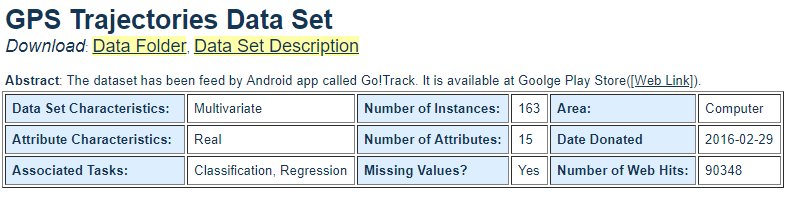

### Attribute Information:
<div class="alert alert-block alert-info">

go_track_tracks.csv: a list of trajectories 
1. id_android - it represents the device used to capture the instance; 
2. speed - it represents the average speed (Km/H) 
3. distance - it represent the total distance (Km) 
4. rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers perception about the traffic during the travel, in other words, 
if volunteers move to some place and face traffic jam, maybe they will evaluate 'bad'. (3- good, 2- normal, 1-bad). 
5. rating_bus - it is other evaluation parameter. (0 - Empty bus, 1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded. 
6. rating_weather - it is another evaluation parameter. (0 - Normal, 1- raining, 2- sunny). 
7. car_or_bus - (1 - car, 2-bus) 
8. linha - information about the bus that does the pathway 


https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories

**Citation Request:**

We have some papers that used this dataset. The first was presented in BRACIS (4th Brazilian Conference on Intelligent System). 
The paper was accepted but not published yet. 
The other paper was submitted to AT&T (IJCAI-16). 
The last paper is about the dataset. 

### Goal is to find out following
<div class="alert alert-block alert-warning">

**EDA**
1. How many users use car or bus or both?
2. Plot distance vs time (For car & bus)
3. Plot speed vs weather (For car & bus)
4. Plot speed vs weather vs bus rating
3. Average communiting time by Bus or Car?
    
**With Linear Regression can we analyze following**
> **Simple Linear Regression**

Where: 
- Y = Distance Travelled
- X = Speed 

> **Complex Linear Regression**

- Factors impacting rating (Y - Dependent variable)
- Explaintory variable: X1 = Bus Rating, X2 = Weather rating, X3 = Car or bus, X4 = Speed

**With Logistic Regression can we analyze following**
- Filter users who use car and bus both & find probablity based on weather, if they will use a car or bus?

**With Decision Tree can we analyze following**
- Filter users who use car and bus both & identify when they use car and when they use bus
    >Is it the weather rating or bus rating

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import pandas_profiling
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/omsarmalkar/Machine-Learning/Linear-Regression-Practice/go_track_tracks.csv', index_col=0)
data.head()

id_android      speed      time  distance  rating  rating_bus  \
id                                                                  
1            0  19.210586  0.138049     2.652       3           0   
2            0  30.848229  0.171485     5.290       3           0   
3            1  13.560101  0.067699     0.918       3           0   
4            1  19.766679  0.389544     7.700       3           0   
8            0  25.807401  0.154801     3.995       2           0   

    rating_weather  car_or_bus linha  
id                                    
1                0           1   NaN  
2                0           1   NaN  
3                0           2   NaN  
4                0           2   NaN  
8                0           1   NaN

In [4]:
data.shape    #checking shape of data

(163, 9)

In [5]:
data.info()   # info of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 38092
Data columns (total 9 columns):
id_android        163 non-null int64
speed             163 non-null float64
time              163 non-null float64
distance          163 non-null float64
rating            163 non-null int64
rating_bus        163 non-null int64
rating_weather    163 non-null int64
car_or_bus        163 non-null int64
linha             80 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 12.7+ KB


In [6]:
data.sample(5)   #data sample

id_android      speed      time  distance  rating  rating_bus  \
id                                                                   
78            1   1.551772  0.009022     0.014       2           0   
67            1   0.180865  0.033174     0.006       2           0   
2             0  30.848229  0.171485     5.290       3           0   
43            1  28.104521  0.276575     7.773       3           0   
209          10   0.125918  0.262074     0.033       2           0   

     rating_weather  car_or_bus  linha  
id                                      
78                0           2    NaN  
67                0           2    NaN  
2                 0           1    NaN  
43                0           1    NaN  
209               0           1  carro

In [7]:
data = data[['id_android','speed','time','distance','rating','rating_bus','rating_weather','car_or_bus']] #Filtering data

In [8]:
data = data.reset_index(drop=True)  #reset index

In [9]:
data.head(5)   #rechecking index reset with sample

id_android      speed      time  distance  rating  rating_bus  \
0           0  19.210586  0.138049     2.652       3           0   
1           0  30.848229  0.171485     5.290       3           0   
2           1  13.560101  0.067699     0.918       3           0   
3           1  19.766679  0.389544     7.700       3           0   
4           0  25.807401  0.154801     3.995       2           0   

   rating_weather  car_or_bus  
0               0           1  
1               0           1  
2               0           2  
3               0           2  
4               0           1

In [10]:
data.describe(include = 'all')    #describe the data (No observations here)

id_android       speed        time    distance      rating  rating_bus  \
count  163.000000  163.000000  163.000000  163.000000  163.000000  163.000000   
mean     7.386503   16.704738    0.264272    5.302411    2.515337    0.386503   
std      7.348742   16.016168    0.292731    7.639011    0.679105    0.687859   
min      0.000000    0.009779    0.002175    0.001000    1.000000    0.000000   
25%      1.000000    1.591016    0.035978    0.034500    2.000000    0.000000   
50%      4.000000   16.685368    0.214466    3.995000    3.000000    0.000000   
75%     10.000000   23.915760    0.390572    7.333000    3.000000    1.000000   
max     27.000000   96.206029    1.942948   55.770000    3.000000    3.000000   

       rating_weather  car_or_bus  
count      163.000000  163.000000  
mean         0.515337    1.466258  
std          0.841485    0.500397  
min          0.000000    1.000000  
25%          0.000000    1.000000  
50%          0.000000    1.000000  
75%          1.000000    2.000000  
max          2.000000    2.000000

In [11]:
pandas_profiling.ProfileReport(data)     #Post Profiling report

### Observations
- Drop duplicates 
- replace zero values in android id with mode

In [12]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)  #dropping duplicates

In [13]:
data.id_android.mode()   #checking mode of android id to fix missing values

0    1
dtype: int64

In [14]:
data['id_android']=data['id_android'].replace(0,1)  #replacing with mode

In [15]:
pandas_profiling.ProfileReport(data)    # Post profiling report

In [16]:
data.rename(columns={'id_android':'user'}, inplace=True)   #renaming column name
 
print(data.columns)

Index(['user', 'speed', 'time', 'distance', 'rating', 'rating_bus',
       'rating_weather', 'car_or_bus'],
      dtype='object')


In [17]:
data.user.unique()    #checking unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [18]:
data.rating	.unique()    #checking unique values

#Rating - (3- good, 2- normal, 1-bad)

array([3, 2, 1], dtype=int64)

In [19]:
data.rating_bus.unique()     #checking unique values
  
#1 - The amount of people inside the bus is little, 
#2 - The bus is not crowded, 
#3- The bus is crowded.

array([0, 3, 1, 2], dtype=int64)

In [20]:
data.rating_weather.unique()     #checking unique values

#( 2- sunny, 1- raining).

array([0, 1, 2], dtype=int64)

In [21]:
data.car_or_bus.unique()     #checking unique values

#(1 - car, 2-bus)

array([1, 2], dtype=int64)

In [22]:
data1 = data.copy(deep=True)      #creating duplicate copy

## EDA
<div class="alert alert-block alert-info">
    
1. How many users use car or bus or both?
2. Plot distance vs time (For car & bus)
3. Plot speed vs weather (For car & bus)
4. Plot speed vs weather vs bus rating
3. Average communiting time by Bus or Car?

<div class="alert alert-block alert-warning">
    
1. **How many users use car or bus or both?**

In [23]:
total = data.groupby(['car_or_bus'])['user'].count().reset_index()          #grouping
total = total.sort_values(by = ['car_or_bus','user'], ascending=True)           #sorting
total

car_or_bus  user
0           1    76
1           2    70

In [24]:
data.loc[data['car_or_bus'] == 1,:].shape[0]  #simplified formula to calculate above

76

In [25]:
data.loc[data['car_or_bus'] == 2,:].shape[0] #simplified formula to calculate above

70

*76 times in total car was used, 70times in total bus was used*

**Dummyfication**

In [26]:
dummy = pd.get_dummies(data1, columns=['car_or_bus'], drop_first=False)   #creating dummies
dummy.rename(columns={'car_or_bus_1':'car','car_or_bus_2':'bus'}, inplace=True)   #Replacing column headers
dummy1 = dummy[['user','car','bus']]   #selecting only required columns for analysis

dummy1.sample(4)

user  car  bus
6       3    1    0
154    24    1    0
137    17    0    1
50      1    0    1

**Users only using car**

In [27]:
total = dummy1.groupby(['user'])['car'].sum().reset_index()         #grouping
total_car_users = total.sort_values(by = ['user','car'], ascending=True)        #sorting
total_car_users = total_car_users[total_car_users['car']!= 0]           #Filtering our car = 0
car_users = total_car_users.car.count()
print("Total Car users are {}".format(car_users))

Total Car users are 15


In [28]:
total1 = dummy1.groupby(['user'])['bus'].sum().reset_index()        #grouping
total_bus_users = total1.sort_values(by = ['user','bus'], ascending=True)         #sorting
total_bus_users = total_bus_users[total_bus_users['bus']!= 0]           #Filtering our bus = 0
bus_users = total_bus_users.bus.count()
print("Total Bus users are {}".format(bus_users))

Total Bus users are 17


In [29]:
Total_users = dummy1.groupby(['user',])['car','bus'].sum().reset_index()          #grouping
cb_users = Total_users.sort_values(by = ['user','car',"bus"], ascending=True)           #sorting
cb_users = cb_users[Total_users['bus']!= 0]   #Filtering our bus = 0
cb_users = cb_users[cb_users['car']!= 0]         #Filtering our car = 0
cb_users_total = cb_users.user.count()     
print("Total users who use Bus & car both are {}".format(cb_users_total))

Total users who use Bus & car both are 5


In [30]:
Total_users   #List of all users and car & bus total

user  car  bus
0      1   22   35
1      2    1    1
2      3   11    0
3      4    3    3
4      5    0    1
5      6    0    1
6      7    6    0
7      8    6    0
8      9    4    0
9     10    4   17
10    11    0    1
11    12    2    0
12    13    1    1
13    14    1    0
14    15    2    0
15    16    2    0
16    17    0    1
17    18    1    0
18    19    0    1
19    20    0    1
20    21    0    2
21    22    0    1
22    23    0    1
23    24   10    0
24    25    0    1
25    26    0    1
26    27    0    1

In [31]:
Alternate1 = pd.merge(left=total_car_users, right=total_bus_users, on='user')   #Alternate merge method to find car and bus users
Alternate1

user  car  bus
0     1   22   35
1     2    1    1
2     4    3    3
3    10    4   17
4    13    1    1

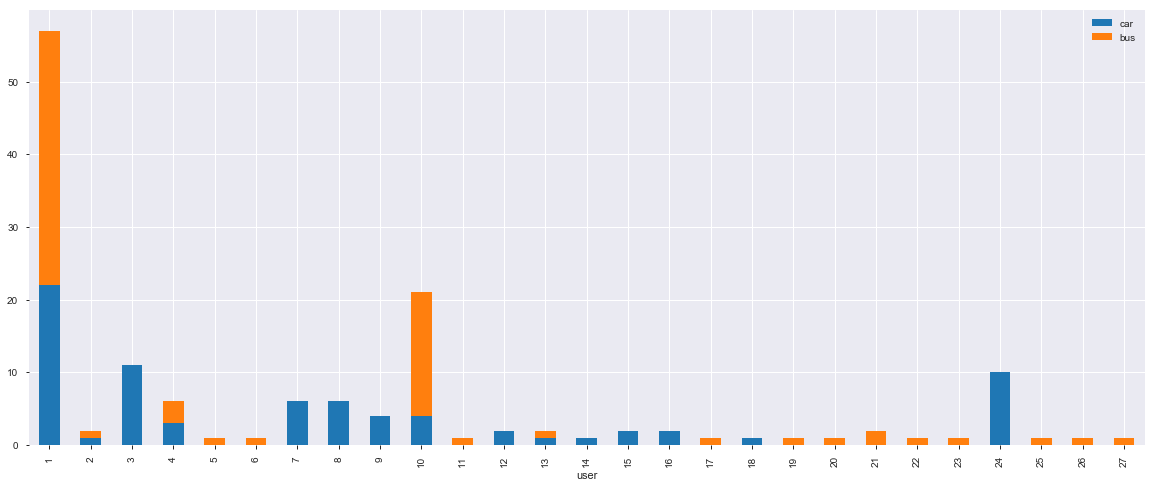

In [32]:
plot1 = Total_users.set_index('user')       
plot1.plot.bar(stacked=True, figsize=(20,8))          #Plotting all 27users used stacked bar

**In Total 163 observations there are 27 users**
<div class="alert alert-block alert-info">
    
- 76 times Car was used
- 70 times Bus was used
- Total Car users are 15
- Total Bus users are 17
- Users who use car and bus both are 5

<div class="alert alert-block alert-warning">
    
2. **Plot distance vs time (For car & bus)**

Text(0.5, 1.0, 'Time vs Distance for Car')

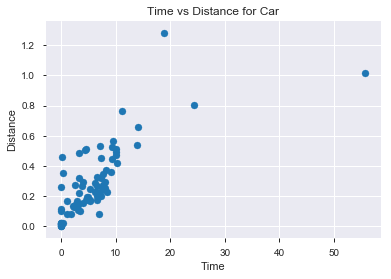

In [33]:
plot3 = dummy[dummy['car']!= 0]        #Scatter Plot for car

plt.scatter(plot3.distance,plot3.time)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title("Time vs Distance for Car")

Text(0.5, 1.0, 'Time vs Distance for Car')

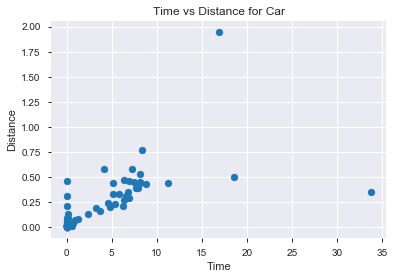

In [34]:
plot3 = dummy[dummy['bus']!= 0]        #Scatter Plot for bus

plt.scatter(plot3.distance,plot3.time)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title("Time vs Distance for Car")

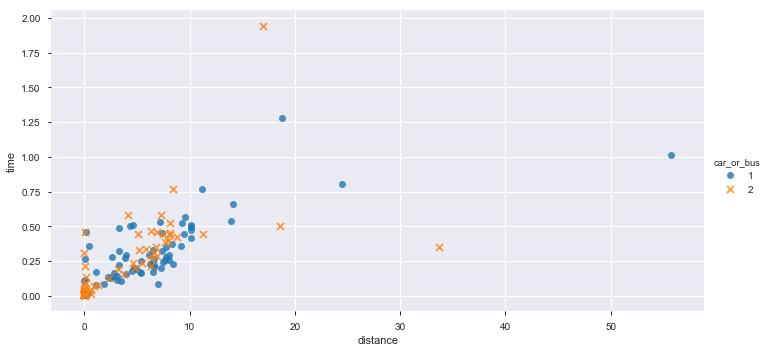

In [35]:
sns.lmplot(x='distance', y='time', hue='car_or_bus',         #Scatter Plot for car and bus
           data=data.loc[data['car_or_bus'].isin(['1', '2'])], 
           fit_reg=False,  height=5, aspect=2, markers=["o", "x"])

**Time vs distance for Car and bus**
<div class="alert alert-block alert-info">
    
No specific observation although there are some outliers observed

<div class="alert alert-block alert-warning">

3. **Plot speed vs weather (For car & bus)**

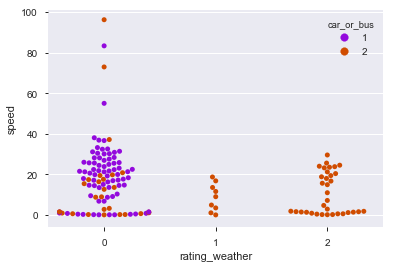

In [36]:
sns.swarmplot(x="rating_weather", y="speed", hue="car_or_bus", palette="gnuplot", data=data1)   #swarm plot for car and bus

<div class="alert alert-block alert-info">

Weather rating (0 - Normal, 1- raining, 2- sunny)

- Its not accuraltely conclusive although when it sunny or rainy people take bus

<div class="alert alert-block alert-warning">

4. **Plot speed vs weather vs bus rating**

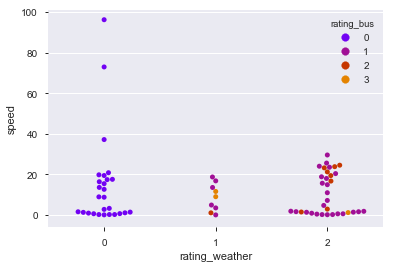

In [37]:
plot4 = data1[data1['car_or_bus']!= 1]   #Filtering out car

sns.swarmplot(x="rating_weather", y="speed", hue="rating_bus", palette="gnuplot", data=plot4)   #swarm plot to analyze bus rating

<div class="alert alert-block alert-info">

Weather rating (0 - Normal, 1- raining, 2- sunny)

Bus Rating - (
0 - Bus is empty
1 - The amount of people inside the bus is little, 
2 - The bus is not crowded, 
3 - The bus is crowded.)

- Bus is crowded during the rains and when its sunny; Speed of bus looks constant in all tyoe of weather

<div class="alert alert-block alert-warning">

5. **Average communiting time/distance/speed by Bus or Car?**

In [38]:
car_avg = data1[data1['car_or_bus']!= 2]                                 #Filtering out bus
car_avg_time = car_avg['time'].sum()/car_avg['time'].count()             #Calculating avg time
car_t = car_avg_time.round(2)                                            #Rounding avg time
print( "Average travel time by car for users is {} hours".format(car_t))

Average travel time by car for users is 0.28 hours


In [39]:
bus_avg = data1[data1['car_or_bus']!= 1]                                 #Filtering out car
bus_avg_time = bus_avg['time'].sum()/bus_avg['time'].count()             #Calculating avg time
bus_t = bus_avg_time.round(2)                                            #Rounding avg time
print( "Average travel time by car for users is {} hours".format(bus_t))

Average travel time by car for users is 0.21 hours


In [40]:
car_avg = data1[data1['car_or_bus']!= 2]                                     #Filtering out bus
car_avg_distance = car_avg['distance'].sum()/car_avg['time'].count()         #Calculating avg distance
car_d = car_avg_distance.round(2)                                            #Rounding avg Distance
print( "Average distance by car for users is {} Kms".format(car_d))

Average distance by car for users is 6.0 Kms


In [41]:
bus_avg = data1[data1['car_or_bus']!= 1]                                     #Filtering out car
bus_avg_distance = bus_avg['distance'].sum()/bus_avg['time'].count()         #Calculating avg distance
bus_d = bus_avg_distance.round(2)                                            #Rounding avg Distance
print( "Average distance by bus for users is {} Kms".format(bus_d))

Average distance by bus for users is 3.54 Kms


In [42]:
Avg_car_speeed = car_avg_distance/car_avg_time                #Diving car distance by time to calculate speed
car_s = Avg_car_speeed.round(1)                               #Rounding avg Speed
print( "Average car speed is {} Kms/hr".format(car_s))

Average car speed is 21.2 Kms/hr


In [43]:
Avg_bus_speeed = bus_avg_distance/bus_avg_time                #Diving bus distance by time to calculate speed
bus_s = Avg_bus_speeed.round(1)                               #Rounding avg Speed
print( "Average car speed is {} Kms/hr".format(bus_s))

Average car speed is 16.8 Kms/hr


## Simple Linear Regression

Where: 
- Y = Distance Travelled
- X = Speed 

In [44]:
data1.describe()

user       speed        time    distance      rating  rating_bus  \
count  146.00000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     7.40411   15.634092    0.248310    4.822459    2.493151    0.397260   
std      7.60361   15.247806    0.263561    6.637088    0.687289    0.699551   
min      1.00000    0.009779    0.002175    0.001000    1.000000    0.000000   
25%      1.00000    1.455779    0.025661    0.027250    2.000000    0.000000   
50%      4.00000   15.507826    0.201893    3.809500    3.000000    0.000000   
75%     10.00000   23.162342    0.366580    7.324750    3.000000    1.000000   
max     27.00000   96.206029    1.942948   55.770000    3.000000    3.000000   

       rating_weather  car_or_bus  
count      146.000000  146.000000  
mean         0.527397    1.479452  
std          0.848489    0.501297  
min          0.000000    1.000000  
25%          0.000000    1.000000  
50%          0.000000    1.000000  
75%          1.000000    2.000000  
max          2.000000    2.000000

In [45]:
slr = data1[['speed','distance']]   #selecting only required columns for analysis (slr = simple linear regression) - now a dataset to analyze

In [46]:
slr.sample()

speed  distance
33  21.513802     14.14

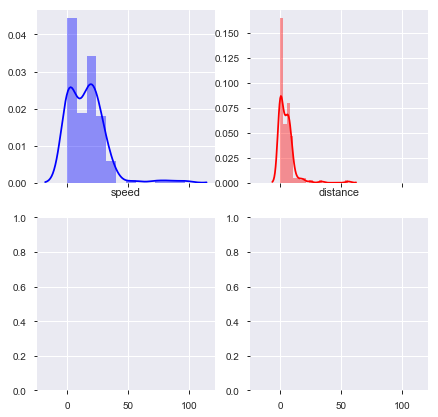

In [47]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(slr.speed, color="b", ax=axes[0, 0])

sns.distplot(slr.distance, color="r", ax=axes[0, 1])

### Checking for correlation

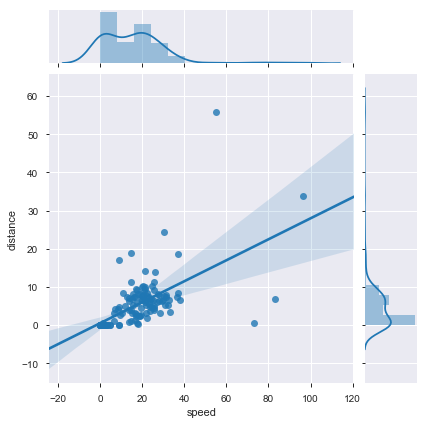

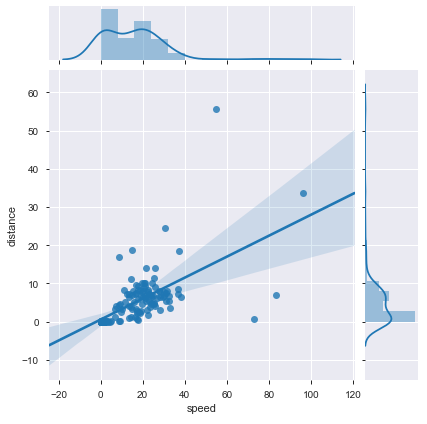

In [48]:
JG1 = sns.jointplot("speed", "distance", data=slr, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

In [49]:
slr.corr()

speed  distance
speed     1.000000  0.630588
distance  0.630588  1.000000

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

![image.png](attachment:image.png)

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?
    
***Linear Regression Equation with Errors in consideration***
While taking errors into consideration the equation of linear regression is: 
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

    
How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
    
***Assumptions of Linear Regression***
1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.
    

### **Preparing X and y using pandas**

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(slr)
dataR = scaler.transform(slr)

In [51]:
dataR = pd.DataFrame(dataR)
dataR.head()

0         1
0  0.235365 -0.328145
1  1.001227  0.070686
2 -0.136487 -0.590304
3  0.271961  0.435047
4  0.669495 -0.125101

In [52]:
dataR.columns = ['speed','distance']
dataR.sample()

speed  distance
64  0.368865  0.796536

In [53]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
speed       146 non-null float64
distance    146 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


In [54]:
feature_cols = ['speed']                # create a Python list of feature names
X = dataR[feature_cols]  
y = dataR.speed

In [55]:
# Splitting the dataset into training and test sets.
data_train, data_test = train_test_split(dataR, test_size = 0.2, random_state = 0)

In [56]:
# Dropping distance from x_train and x_test matrices, and creating y_train and y_test vectors for price values.
x_train = data_train.drop(['distance'], 1)
y_train = data_train['distance']
x_test = data_test.drop(['distance'], 1)
y_test = data_test['distance']

In [57]:
from sklearn.model_selection import train_test_split                 #importing train_test_split module

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [58]:
# Checking the shapes of training and test sets.
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (116, 1)
Shape of y_train:  (116,)
Shape of x_test:  (30, 1)
Shape of y_test:  (30,)


In [59]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_pred_train = linreg.predict(x_train)

In [61]:
y_pred_train[:10]          #Train prediction

array([-0.7009647 ,  0.25712433, -0.70441785, -0.65400104, -0.64817812,
       -0.08048619,  0.36212443, -0.01140923, -0.64545914, -0.08057019])

In [62]:
y_pred_test = linreg.predict(x_test)

In [63]:
y_pred_test[:10]              #test prediction

array([ 0.09882421, -0.23306785,  0.08449311, -0.17345305,  0.69428193,
        0.21206824, -0.68570651, -0.12474479,  0.06525853,  0.08821507])

## Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [64]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (116, 1)
y_train shape:  (116,)

Test cases as below
X_test shape:  (30, 1)
y_test shape:  (30,)


In [65]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):        
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
    y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

    RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
    print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents

In [66]:
X = dataR[feature_cols]  
y = dataR.distance
linreg = linear_reg(X,y)

RMSE for the test set is 0.2277528521520173


### Interpreting Model Coefficients

In [67]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.01346259420130595
Coefficients: [0.62958907]


In [68]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [69]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.01346259420130595
speed 0.6295890684314452


__Y = - (0.0134) + (0.6295890 `*` Speed)__

## Using the Model for Prediction

In [70]:
y_pred_train = linreg.predict(X_train)  
y_pred_train

array([ 0.14160728,  0.16052864, -0.52707847, -0.65699631,  0.68619363,
        2.79127793, -0.59487557, -0.65373006,  0.14354884, -0.65309791,
       -0.62312482, -0.64848512,  0.41426732,  0.20055905,  0.40804408,
        0.08340708, -0.65847367,  0.37079016, -0.20789766,  0.39789292,
       -0.46730302, -0.64208483,  0.71438752,  0.03396957,  0.35407136,
       -0.38074021, -0.06293289,  0.59820497,  0.33328323,  0.01647827,
       -0.09939346, -0.0516651 , -0.65388258, -0.45938699,  0.86560035,
        0.39329124,  0.07024783,  0.22132499,  0.23669303, -0.63805395,
       -0.62628684, -0.65346317, -0.59958485,  0.03009449, -0.04386172,
       -0.60134777,  0.21696073, -0.03802154,  0.68025228,  0.50321973,
       -0.05502762,  2.36032164, -0.09946809, -0.6043369 ,  0.04718359,
       -0.05903039, -0.63482268, -0.2923605 , -0.58734168, -0.10054867,
        0.58895489,  0.32605366, -0.54198037,  0.91437978,  0.11378453,
        0.21877079,  0.01261557, -0.65600664,  3.32484262, -0.65

In [71]:
y_pred_test = linreg.predict(X_test)                 # make predictions on the testing set
y_pred_test

array([-0.66081858,  0.35099936,  0.1915712 , -0.59573206, -0.64471388,
       -0.51801436, -0.18199054, -0.60688027, -0.60376346,  0.62672248,
       -0.60541764,  0.21812503,  0.39757452, -0.26961043, -0.0140375 ,
        0.263654  , -0.65409686,  0.16472733,  0.31256376,  0.26595194,
       -0.63107391,  0.32424563,  0.4792406 , -0.28514587, -0.59692982,
       -0.29975029,  0.58389777,  0.40172716,  0.26969162, -0.61884199])

- We need an evaluation metric in order to compare our predictions with the actual values.

## Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### Model Evaluation using metrics

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Pirce predictions

In [72]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [73]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2758638252010477
MAE for test set is 0.24728682857532988


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Price predictions

In [74]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [75]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.15448435242650113
MSE for test set is 0.07126993566901504


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Price predictions

In [76]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [77]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.39304497506837704
RMSE for test set is 0.2669642966185086


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

## Model Evaluation using Rsquared value.
- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [78]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.86217838370844 0.8609694221620228


In [79]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8602260092589243 0.8552340810181717


## Logistic Regression 
- Filter users who use car and bus both & find probablity based on weather & distance, if they will use a car or bus?

In [80]:
data1.sample()   #checking sample

user     speed      time  distance  rating  rating_bus  rating_weather  \
138    16  9.076859  0.512402     4.651       2           0               0   

     car_or_bus  
138           1

In [81]:
Alternate1  # we had already figured out users who used car and bus both

user  car  bus
0     1   22   35
1     2    1    1
2     4    3    3
3    10    4   17
4    13    1    1

In [82]:
Alternate1.user.unique()  #checking unique values

array([ 1,  2,  4, 10, 13], dtype=int64)

In [83]:
filter_list = Alternate1.user.unique()   #create filterlist with users who use car and bus both

logr = data1[data1.user.isin(filter_list)]    #filtering rows with users who use car and bus both
logr

user      speed      time  distance  rating  rating_bus  rating_weather  \
0       1  19.210586  0.138049     2.652       3           0               0   
1       1  30.848229  0.171485     5.290       3           0               0   
2       1  13.560101  0.067699     0.918       3           0               0   
3       1  19.766679  0.389544     7.700       3           0               0   
4       1  25.807401  0.154801     3.995       2           0               0   
5       2   1.346913  0.006682     0.009       2           0               0   
7       1  17.405131  0.038782     0.675       3           0               0   
8       1  15.395436  0.526844     8.111       3           0               0   
9       1   8.902729  0.003033     0.027       2           0               0   
12      1  16.356733  0.077033     1.260       2           0               0   
13      1  17.542800  0.333869     5.857       2           0               0   
14      4   9.451816  0.276772     2.616       2           0               0   
16      4  16.263504  0.450948     7.334       2           0               0   
17      4  21.223594  0.289725     6.149       3           0               0   
18      4  19.423655  0.236567     4.595       2           0               0   
19      4  20.799629  0.425440     8.849       3           0               0   
20      4   8.724372  1.942948    16.951       1           0               0   
25      1  12.611045  0.579096     7.303       2           0               0   
29      1  17.177635  0.166088     2.853       3           0               0   
30      1  17.097823  0.133233     2.278       3           0               0   
31      1  32.520702  0.203716     6.625       3           0               0   
32      1  19.934810  0.329123     6.561       3           0               0   
33      1  21.513802  0.657253    14.140       2           0               0   
34      1  27.525770  0.292381     8.048       3           0               0   
35      1  28.104521  0.276575     7.773       3           0               0   
39      1  22.377925  0.347172     7.769       2           0               0   
40      1  24.908256  0.264852     6.597       2           0               0   
43      2  72.926755  0.009064     0.661       1           0               0   
44      1   0.066375  0.015066     0.001       2           0               0   
45      1  83.328135  0.083717     6.976       3           0               0   
..    ...        ...       ...       ...     ...         ...             ...   
100    10  18.793595  0.126160     2.371       3           1               2   
102    10  14.900392  0.462270     6.888       3           1               2   
104    10  25.554712  0.442071    11.297       3           1               2   
105    10   6.769634  0.168842     1.143       3           0               0   
106    10  22.468184  0.369901     8.311       3           0               0   
107     1  13.532219  0.467846     6.331       1           1               1   
108    10  17.972098  0.454093     8.161       3           1               2   
110    10  29.540954  0.213940     6.320       3           1               2   
111    10  15.620217  0.330469     5.162       3           1               2   
112     1   0.009779  0.306768     0.003       1           1               1   
113     1  16.778895  0.193100     3.240       1           1               1   
114     1   4.871448  0.008622     0.042       3           1               1   
116     1   0.366663  0.019091     0.007       2           0               0   
117     1   0.559217  0.050070     0.028       3           1               2   
118     1   4.680390  0.003846     0.018       3           1               2   
119     1   1.601352  0.006245     0.010       3           1               2   
120    10  18.705276  0.436936     8.173       1           1               1   
121     1   1.834161  0.002181     0.004       3           1               2   
122  

In [84]:
logr = logr[['car_or_bus','distance','rating_weather']]    #Selecting columns and rearranging them
logr

car_or_bus  distance  rating_weather
0             1     2.652               0
1             1     5.290               0
2             2     0.918               0
3             2     7.700               0
4             1     3.995               0
5             1     0.009               0
7             2     0.675               0
8             2     8.111               0
9             2     0.027               0
12            2     1.260               0
13            2     5.857               0
14            1     2.616               0
16            1     7.334               0
17            1     6.149               0
18            2     4.595               0
19            2     8.849               0
20            2    16.951               0
25            2     7.303               0
29            1     2.853               0
30            1     2.278               0
31            1     6.625               0
32            1     6.561               0
33            1    14.140               0
34            1     8.048               0
35            1     7.773               0
39            1     7.769               0
40            1     6.597               0
43            2     0.661               0
44            1     0.001               0
45            1     6.976               0
..          ...       ...             ...
100           2     2.371               2
102           2     6.888               2
104           2    11.297               2
105           1     1.143               0
106           1     8.311               0
107           2     6.331               1
108           2     8.161               2
110           2     6.320               2
111           2     5.162               2
112           2     0.003               1
113           2     3.240               1
114           2     0.042               1
116           1     0.007               0
117           2     0.028               2
118           2     0.018               2
119           2     0.010               2
120           2     8.173               1
121           2     0.004               2
122           1     7.194               0
123           2     0.001               2
124           2     0.038               2
125           1    13.951               0
127           1     0.005               0
128           2     7.435               2
129           2     8.382               2
134           2     4.853               2
135           2     5.105               1
141           2     6.809               2
142           2     4.146               2
143           2     0.007               2

[88 rows x 3 columns]

In [85]:
logr = pd.get_dummies(logr, columns=['rating_weather'], drop_first=True)    #Creating Dummies of Weather and dropping 0 - Normal

In [86]:
logr.sample(5)  #Sample check

# 0 0 = normal
# 0 1 = sunny
# 1 0 = Rainy

car_or_bus  distance  rating_weather_1  rating_weather_2
33            1    14.140                 0                 0
125           1    13.951                 0                 0
94            2     6.339                 0                 1
142           2     4.146                 0                 1
16            1     7.334                 0                 0

In [87]:
logr.rename(columns={'rating_weather_1':'Raning', 'rating_weather_2':'Sunny'}, inplace=True)  #renaming headers

In [88]:
logr.sample()  #sample to confirm remaining

car_or_bus  distance  Raning  Sunny
122           1     7.194       0      0

Text(0.5, 1.0, 'Pair Plot')

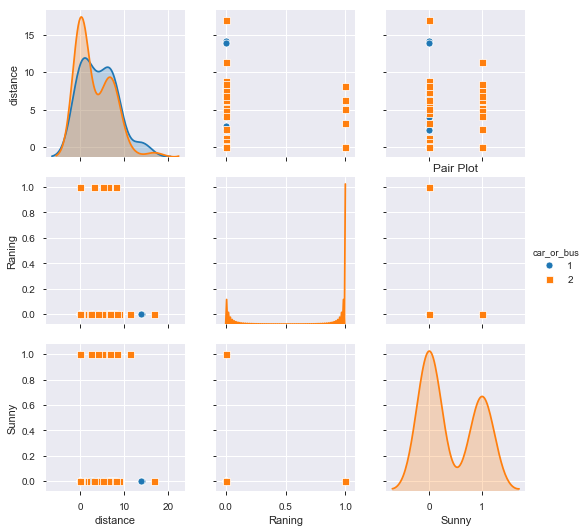

In [89]:
sns.pairplot(logr[["car_or_bus","distance","Raning","Sunny"]],vars = ["distance","Raning","Sunny"],hue="car_or_bus", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

## Logistic Regression

### Introduction to Logistic Regression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._


Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 

### Mathematics behind Logistic Regression

The __odds__ for an event is the __(probability of an event occuring) / (probability of event not occuring)__:

For __Linear regression__: continuous response is modeled as a linear combination of the features: __y = β0 + β1x__<br/>
For __Logistic regression__: log-odds of a categorical response being "__true__" (1) is modeled as a linear combination of the features:

In other words:

- Logistic regression outputs the __probabilities of a specific class__.
- Those probabilities can be converted into __class predictions__.


The logistic function has some nice properties:

- Takes on an __"s"__ shape
- Output is bounded by __0 and 1__<br/>


We have covered how this works for binary classification problems (two response classes). But what about __multi-class classification problems__ (more than two response classes)?

- Most common solution for classification models is __"one-vs-all"__ (also known as __"one-vs-rest"__): decompose the problem into multiple binary classification problems.
- __Multinomial logistic regression__ can solve this as a single problem.

Logistic Regression was used in __biological sciences__ in early twentieth century. It was then used in many social science applications. For instance,
- The Trauma and Injury Severity Score (TRISS), which is widely used to __predict mortality in injured patients__, was originally developed by Boyd et al. using logistic regression.<br/> 
- Many other medical scales used to __assess severity__ of a patient have been developed using logistic regression.<br/>
- Logistic regression may be used to __predict the risk of developing a given disease__ (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.).<br/>

Now a days, Logistic Regression have the following applications 
1. Image segementation and  categorization
2. Geographic image processing
3. Handwriting recognition
4. Detection of  myocardinal infarction
5. Predict whether a person is depressed or not based on a bag of words from corpus. 


The reason why logistic regression is widely used despite of the state of the art of deep neural network is that logistic regression is very __efficient__ and does __not__ require too much __computational resources__, which makes it __affordable__ to run on production.

In [90]:
X = logr.loc[:,logr.columns != 'car_or_bus']   #creating X as distance raining and sunny
X.head()

distance  Raning  Sunny
0     2.652       0      0
1     5.290       0      0
2     0.918       0      0
3     7.700       0      0
4     3.995       0      0

In [91]:
y = logr.car_or_bus   #Y = Car or bus  (1 = Car 2 = bus)

## Splitting X and y into training and test datasets.

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [93]:
print(X_train.shape)
print(y_train.shape)

(70, 3)
(70,)


## Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Using the Model for Prediction

In [95]:
y_pred_train = logreg.predict(X_train)  

In [96]:
y_pred_test = logreg.predict(X_test)   

- We need an evaluation metric in order to compare our predictions with the actual values.

### Model evaluation 
__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### Model Evaluation using __accuracy classification score__

In [97]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8333333333333334


### Model Evaluation using confusion matrix

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

   0   1
0  0   2
1  1  15


In [99]:
confusion_matrix.index = ['Actual Car','Actual Bus']
confusion_matrix.columns = ['Predicted Car','Predicted Bus']
confusion_matrix

Predicted Car  Predicted Bus
Actual Car              0              2
Actual Bus              1             15

This means 0 + 15 = __15 correct predictions__ & 2 + 1 = __3 false predictions__.

__Adjusting Threshold__ for predicting Bus or Car.

- In the section above section we have used, __.predict__ method for classification. This method takes 0.5 as the default threshhod for prediction.<br/>
- Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. <br/>
- For this we are going to use __.predict_proba__ method instead of using .predict method. 

Setting the threshold to __0.99__

In [100]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> .99,1,2)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.8888888888888888


The accuracy have been __increased__, changing from __0.83 to 0.88__. Hence, 0.99 is also _ good threshold__ for our model. <br/>

## Decision Tree 
- Filter users who use car and bus both & identify when they use car and when they use bus
    >Is it the weather rating or bus rating

### Introduction

A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks.__<br/>
The intuition behind the decision tree algorithm is simple, yet also very powerful.<br/>

Everyday we need to make numerous __decisions__, many smalls and a few big.<br>
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using __decision tree approcah__ or you can also say that decision tree approach is based on our thinking process. <br/>

- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.<br/>
- It is a very natural decision making process asking a series of question in a nested if then else statement.
- On each node you ask a question to further split the data held by the node. <br/>

So, lets understand what is a decision tree with a help of a real life example.<br>


Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:

1. __Is this person a close friend or just an acquaintance?__
 - If the person is just an acquaintance, then decline the request;
 - if the person is friend, then move to next step.

2. __Is the person asking for the car for the first time?__
 - If so, lend them the car,
 - otherwise move to next step.

3. __Was the car damaged last time they returned the car?__
 - If yes, decline the request; 
 - if no, lend them the car.<br/>
 


The structure of decision tree resembles an __upside down tree__, with its roots at the top and braches are at the bottom. The end of the branch that doesnt split any more is the decision or leaf.

Now, lets see what is __Decision tree algorithm.__<br/> 
Decision tree is a type of __supervised learning algorithm__ (having a pre-defined target variable) that is mostly used in classification problems.
- It works for both __categorical and continuous__ input and output variables.
- In this technique, we __split the population__ or sample into two or more homogeneous sets (or sub-populations) based on most __significant splitter / differentiator__ in input variables.

### Important Terminology related to Decision Trees

Let’s look at the basic terminology used with Decision trees:

- __Root Node__: <br/>It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- __Splitting__: <br/>It is a process of dividing a node into two or more sub-nodes.
- __Decision Node__:<br/> When a sub-node splits into further sub-nodes, then it is called decision node.
- __Leaf/ Terminal Node__:<br/> Nodes do not split is called Leaf or Terminal node.
- __Pruning__:<br/> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
- __Branch / Sub-Tree__:<br/> A sub section of entire tree is called branch or sub-tree.
- __Parent and Child Node__:<br/> A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

### Types of Decision Trees¶

Types of decision tree is based on the __type of target variable__ we have. It can be of two types:

- __Categorical Variable Decision Tree__: <br/>
 - Decision Tree which has __categorical target variable__ then it called as categorical variable decision tree.
- __Continuous Variable Decision Tree__:<br/>
 - Decision Tree has __continuous target variable__ then it is called as Continuous Variable Decision Tree.<br/>
 
__Example__:<br/>
- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (__Yes/ No__).<br/> For this we are predicting values for categorical variable. So, the decision tree approach that will be used is __Categorical Variable Decision Tree.__ <br/>
- Now, suppose insurance company does not have income details for all customers. But, we know that this is an important variable, then we can build a decision tree to predict customer income based on occupation, product and various other variables.<br/> In this case, we are predicting values for continuous variable. So , This approach is called __Continuous Variable Decision Tree__.

### Concept of Homogenity

__Homogenous__ populations are __alike__ and __heterogeneous__ populations are __unlike__.<br/>
- A heterogenous population is one where individuals are __not similar__ to one another.<br/>
- For example, you could have a heterogenous population in terms of humans that have migrated from different regions of the world and currently live together. That population would likely be heterogenous in regards to height, hair texture, disease immunity, and other traits because of the varied background and genetics.


__Note__: In real world you would never get this level of homogeniety. So out of the hetrogenous options you need to select the one having maximum homoginiety. To select the feature which provide maximum homoginety we use __gini & entropy__ techniques.

What Decision tree construction algorithm will try to do is to __create a split in such a way that the homogeneity of different pieces must be as high as possible.__

Let’s say we have a sample of __30 students__ with three variables:
1. Gender (Boy/ Girl)
2. Class (IX/ X) and,
3. Height (5 to 6 ft).<br/>

15 out of these 30 play cricket in leisure time. Now, I want to __create a model to predict who will play cricket during leisure period__? In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.

This is where decision tree helps, it will segregate the students based on all values of three variables and identify the variable, which creates the best homogeneous sets of students (which are heterogeneous to each other). In the snapshot below, you can see that variable __Gender__ is able to identify best homogeneous sets compared to the other two variables.

As mentioned above, decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population. Now the question which arises is, how does it identify the variable and the split? To do this, decision tree uses various algorithms, which we will shall discuss in the following section.

### How does a tree decide where to split?
The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. Let’s look at the most commonly used algorithms in decision tree:


### Gini Index
#### 4.5.1 Gini Index
Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

- It works with categorical target variable “Success” or “Failure”.
- It performs only Binary splits
- Higher the value of Gini higher the homogeneity.
- CART (Classification and Regression Tree) uses Gini method to create binary splits.

__Steps to Calculate Gini for a split__

1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (1 `-` p<sup>2</sup> `-` q<sup>2</sup>).
2. Calculate Gini for split using weighted Gini score of each node of that split


__Example__: 
– Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.


__Gini for Root node__: 
 - 1 `-` (0.5 `*` 0.5) `-` (0.5 `*` 0.5) = 0.50
 
__Split on Gender__:

1. Gini for sub-node __Female__
  - 1 `-` (0.2 `*` 0.2) `-` (0.8 `*` 0.8) = 0.32
  
  
2. Gini for sub-node __Male__
  - 1 `-` (0.65 `*` 0.65) `-` (0.35 `*` 0.35) = 0.45
  
  
3. Weighted Gini for Split __Gender__ 
  -  (10/30) `*` 0.32 `+` (20/30) `*` 0.45 = 0.41
  

__Split on Class__ : 

1. Gini for sub-node __Class IX__ =
  - 1 `-` (0.43 `*` 0.43) `-` (0.57 `*` 0.57) = 0.49
  
  
2. Gini for sub-node __Class X__ =
  - 1 `-` (0.56 `*` 0.56) `-` (0.44 `*` 0.44) = 0.49
  
  
3. Calculate weighted Gini for Split __Class__  
  - (14/30) `*` 0.51 `+` (16/30) `*` 0.51 = 0.49
  
  


Above, you can see that:
__Gini score__ for Split on __Gender__ __`<`__ Gini score for Split on __Class__.<br/>
Also, __Gini score__ for __Gender__ __`<`__ Gini score for __root node__.<br/>
Hence, the __node split will take place on Gender.__


####  Information Gain:
Look at the image below and think which node can be described easily.<br/>
I am sure, your answer is C because it requires less information as all values are similar. On the other hand, B requires more information to describe it and A requires the maximum information.<br/> In other words, we can say that __C is a Pure node, B is less Impure and A is more impure.__


Now, we can build a conclusion that:
- less impure node requires less information to describe it.
- more impure node requires more information. 

Information theory is a measure to define this degree of disorganization in a system by a parameter known as __Entropy__.
- If the sample is completely __homogeneous__, then the __entropy is zero__ and<br/>
- If the sample is an __equally divided__ (50% – 50%), it has __entropy of one__.

Entropy can be calculated using formula:
where,<br/>
__p__ & __q__ is __probability of success and failure__ respectively in that node.<br/> 
- __Information Gain = 1 - Entropy__.<br/>
- The model will choose the split which facilitates __maximum information gain__, which in turn means __minimum Entropy__.<br/>
- So, it chooses the split which has __lowest entropy__ compared to parent node and other splits.
- __The lesser the entropy, the better it is.__

__Steps to calculate entropy for a split__:

1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and 
3. Calculate weighted average of all sub-nodes available in split.
4. Caluclate the Information Gain in various split options w.r.t parent node
5. Choose the split with highest Information Gain.


Example: Let’s use this method to identify best split for student example.

 - __Entropy for parent node__
    - `-` (15/30) log2 (15/30) `–` (15/30) log2 (15/30) = 1.<br/>
      Here 1 shows that it is a impure node.
      
      
- __Entropy for Female node__ 
    - `-` (2/10) log2 (2/10) `–` (8/10) log2 (8/10) = 0.72 
    
    
- __Entropy for male node__
    - `-` (13/20) log2 (13/20) `–` (7/20) log2 (7/20) = 0.93
    
    
- __Entropy for split Gender__ = Weighted entropy of sub`-`nodes 
   - (10/30) `*` 0.72 + (20/30) `*` 0.93 = 0.86
   
-------------------------------------------------------------------------------------
- __Information Gain for split Gender__ = Entropy of Parent Node `-` Weighted entropy for Split Gender 
   - 1 `-` 0.86 = 0.14
-------------------------------------------------------------------------------------
   
   
   
- __Entropy for Class IX node__,
   - `-`(6/14) log2 (6/14) `–` (8/14) log2 (8/14) = 0.99
   
   
- __Entropy for Class X node__,
   - `-`(9/16) log2 (9/16) `–` (7/16) log2 (7/16) = 0.99.
   
   
- __Entropy for split Class__,
   -  (14/30) `*` 0.99 `+` (16/30) `*` 0.99 = 0.99
   

-------------------------------------------------------------------------------------
- __Information Gain for split Class__ = Entropy of Parent Node `-` Weighted entropy for Split Class 
   - 1 `-` 0.99 = 0.01
-------------------------------------------------------------------------------------

Observe that:<br/>
__Information Gain for Split on Gender > Information Gain for Split on Class__,<br/> So, __the tree will split on Gender.__<br/>


### Advantages of using Decision Tree
- __Easy to Understand__: 
 - Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. 
 - Its graphical representation is very intuitive and users can easily relate their hypothesis.
- __Less data cleaning required__: 
 - It requires less data cleaning compared to some other modeling techniques.
 - It is not influenced by outliers and missing values to a fair degree.
- __Data type is not a constraint__: 
 - It can handle both numerical and categorical variables.
- __Non Parametric Method__: 
 - Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
 
 ### Shortcomings of Decision Trees
- __Over fitting__:
 - Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
- __Not a great contributor for regression__:
 - While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

In [141]:
data1.sample(5)

user      speed      time  distance  rating  rating_bus  rating_weather  \
120    10  18.705276  0.436936     8.173       1           1               1   
58      7  16.893421  0.563711     9.523       3           0               0   
56      1   1.261974  0.133125     0.168       2           0               0   
152    24  25.562397  0.177526     4.538       3           0               0   
29      1  17.177635  0.166088     2.853       3           0               0   

     car_or_bus  
120           2  
58            1  
56            2  
152           1  
29            1

In [142]:
data1.rating.unique()

array([3, 2, 1], dtype=int64)

In [143]:
numbers = [1, 3]

dt = data1[data1.rating.isin(numbers)]    #filtering rows with users who use car and bus both
dt.sample(10)

user      speed      time  distance  rating  rating_bus  rating_weather  \
34      1  27.525770  0.292381     8.048       3           0               0   
58      7  16.893421  0.563711     9.523       3           0               0   
86      1   1.580681  0.005061     0.008       3           1               2   
100    10  18.793595  0.126160     2.371       3           1               2   
41      5  37.140902  0.500849    18.602       3           0               0   
153    24  38.028107  0.171347     6.516       3           0               0   
96     10  21.195493  0.310774     6.587       3           2               2   
147    21  23.502928  0.159427     3.747       3           1               2   
45      1  83.328135  0.083717     6.976       3           0               0   
107     1  13.532219  0.467846     6.331       1           1               1   

     car_or_bus  
34            1  
58            1  
86            2  
100           2  
41            2  
153           1  
96            2  
147           2  
45            1  
107           2

In [144]:
dt = pd.get_dummies(dt, columns=['rating_bus','rating_weather'], drop_first=True) 

# rating_bus -  (0 - Empty bus, 1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded.
# rating_weather -  (0 - Normal, 1- raining, 2- sunny).
# car_or_bus - (1 - car, 2-bus)

In [145]:
dt.sample()

user      speed      time  distance  rating  car_or_bus  rating_bus_1  \
0     1  19.210586  0.138049     2.652       3           1             0   

   rating_bus_2  rating_bus_3  rating_weather_1  rating_weather_2  
0             0             0                 0                 0

In [146]:
dt.rename(columns={'rating_bus_1':'bus_lc', 'rating_bus_2':'bus_nc', 'rating_bus_3':'bus_c',    #Bus_lc = little crowded, nc= not crowded, c=crowded
                      'rating_weather_1':'raining', 'rating_weather_2':'sunny'
                          }, inplace=True)  #renaming headers

In [147]:
dt = dt[['rating','car_or_bus','bus_lc','bus_nc','bus_c','raining','sunny','speed']] 

In [148]:
dt.sample(3)

rating  car_or_bus  bus_lc  bus_nc  bus_c  raining  sunny      speed
11        3           1       0       0      0        0      0  14.440098
159       3           1       0       0      0        0      0  30.173788
34        3           1       0       0      0        0      0  27.525770

In [149]:
dt.rating.unique()

array([3, 1], dtype=int64)

### Preparing X and y using pandas

In [150]:
X = dt.loc[:,dt.columns != 'rating']
X.head(2)

car_or_bus  bus_lc  bus_nc  bus_c  raining  sunny      speed
0           1       0       0      0        0      0  19.210586
1           1       0       0      0        0      0  30.848229

In [151]:
y = dt.rating 

__Splitting X and y into training and test datasets.__

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [153]:
print(X_train.shape)
print(y_train.shape)

(83, 7)
(83,)


## Decision Tree in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn import tree
    model = tree.DecisionTreeClassifier(criterion='gini')
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

In [154]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [155]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

In [156]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

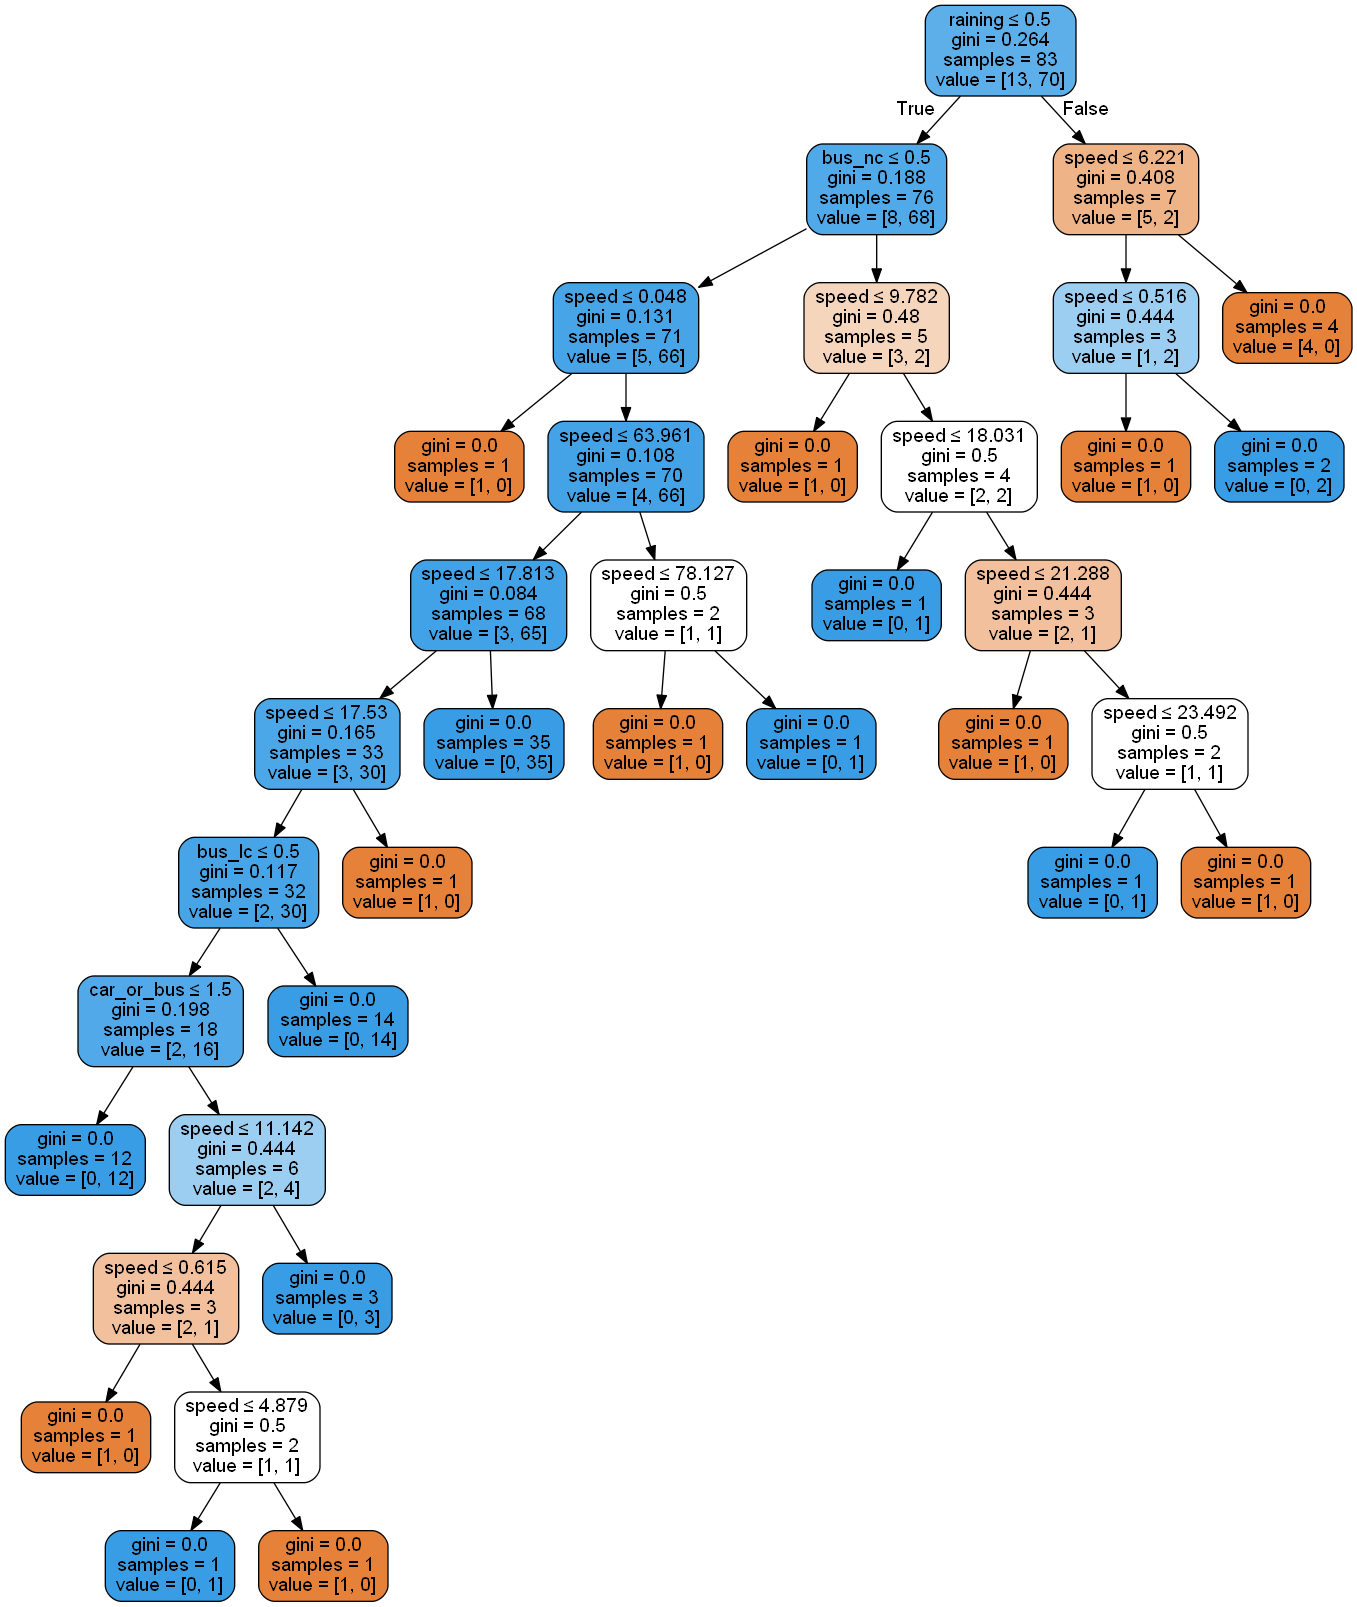

In [157]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

### Using the Model for Prediction

In [158]:
y_pred_train = model.predict(X_train)  

In [159]:
y_pred_test = model.predict(X_test)    

### Model evaluation

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

__Model Evaluation using accuracy_score__

In [160]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8571428571428571


__Model Evaluation using confusion matrix__

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>


In [162]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Good Rating','Actual Bad Rating']
confusion_matrix.columns = ['Predicted Good Rating','Predicted Bad Rating']
confusion_matrix

Predicted Good Rating  Predicted Bad Rating
Actual Good Rating                      2                     1
Actual Bad Rating                       2                    16

__This means 88 + 51 = 139 correct predictions & 22 + 18 = 40 false predictions.__